In [ ]:
!pip install --upgrade kagglehub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: kagglehub
    Found existing installation: kagglehub 0.3.7
    Uninstalling kagglehub-0.3.7:
      Successfully uninstalled kagglehub-0.3.7


In [ ]:
import kagglehub

# Download dataset
path = kagglehub.dataset_download("adilshamim8/sleep-cycle-and-productivity")

# Print the actual folder path
print("Path to dataset:", path)

100%|██████████| 155k/155k [00:00<00:00, 28.1MB/s]

Extracting files...
Path to dataset: /root/.cache/kagglehub/datasets/adilshamim8/sleep-cycle-and-productivity/versions/1


In [72]:
import os

# List the dataset files
dataset_files = os.listdir(path)
print(dataset_files)

['sleep_cycle_productivity.csv']


In [73]:
import pandas as pd

# Replace 'sleep_data.csv' with the actual file name
df = pd.read_csv(os.path.join(path, "sleep_cycle_productivity.csv"))

# Show first few rows
df.head()

,Date,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
0,2024-04-12,1860,32,Other,23.33,4.61,5.28,3,86,87,116,8.808920,8,3,6
1,2024-11-04,1769,41,Female,21.02,2.43,5.41,5,32,21,88,6.329833,10,3,7
2,2024-08-31,2528,20,Male,22.10,3.45,5.35,7,17,88,59,8.506306,10,9,10
3,2024-02-22,8041,37,Other,23.10,6.65,7.55,8,46,34,80,6.070240,8,4,2
4,2024-02-23,4843,46,Other,21.42,4.17,6.75,10,61,269,94,11.374994,8,7,9


In [74]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           5000 non-null   object 
 1   Person_ID                      5000 non-null   int64  
 2   Age                            5000 non-null   int64  
 3   Gender                         5000 non-null   object 
 4   Sleep Start Time               5000 non-null   float64
 5   Sleep End Time                 5000 non-null   float64
 6   Total Sleep Hours              5000 non-null   float64
 7   Sleep Quality                  5000 non-null   int64  
 8   Exercise (mins/day)            5000 non-null   int64  
 9   Caffeine Intake (mg)           5000 non-null   int64  
 10  Screen Time Before Bed (mins)  5000 non-null   int64  
 11  Work Hours (hrs/day)           5000 non-null   float64
 12  Productivity Score             5000 non-null   i

,Person_ID,Age,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5527.152200,38.590600,22.005350,4.980262,6.974902,5.520800,43.962600,146.71140,91.421200,7.987873,5.644200,5.370600,5.548000
std,2595.391771,12.302799,1.157591,1.862508,1.454033,2.863845,25.798541,85.83139,52.079123,2.275734,2.872221,2.835783,2.888419
min,1000.000000,18.000000,20.000000,0.560000,4.500000,1.000000,0.000000,0.00000,0.000000,4.000067,1.000000,1.000000,1.000000
25%,3258.000000,28.000000,21.020000,3.660000,5.690000,3.000000,22.000000,73.00000,46.000000,6.032720,3.000000,3.000000,3.000000
50%,5603.000000,39.000000,22.020000,4.970000,6.960000,5.000000,44.000000,144.00000,92.000000,7.998295,6.000000,5.000000,6.000000
75%,7749.500000,49.000000,23.000000,6.310000,8.210000,8.000000,66.000000,220.00000,136.000000,9.905024,8.000000,8.000000,8.000000
max,9998.000000,59.000000,23.980000,9.420000,9.500000,10.000000,89.000000,299.00000,179.000000,11.999141,10.000000,10.000000,10.000000


In [90]:
df.isnull().sum()
df.fillna(df.median(numeric_only=True), inplace=True)

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score, mean_squared_error




print("Missing values before imputation:\n", df.isnull().sum())

# Fill missing numerical values with the median
df.fillna(df.median(numeric_only=True), inplace=True)

# Convert Gender if needed
if 'Gender' in df.columns:
    df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})



Missing values before imputation:
 Date                                0
Person_ID                           0
Age                                 0
Gender                           5000
Sleep Start Time                    0
Sleep End Time                      0
Total Sleep Hours                   0
Sleep Quality                       0
Exercise (mins/day)                 0
Caffeine Intake (mg)                0
Screen Time Before Bed (mins)       0
Work Hours (hrs/day)                0
Productivity Score                  0
Mood Score                          0
Stress Level                        0
Cluster                             0
dtype: int64


Linear Regression MSE: 8.073774539363082
R2 Score: 0.0013913948353051486


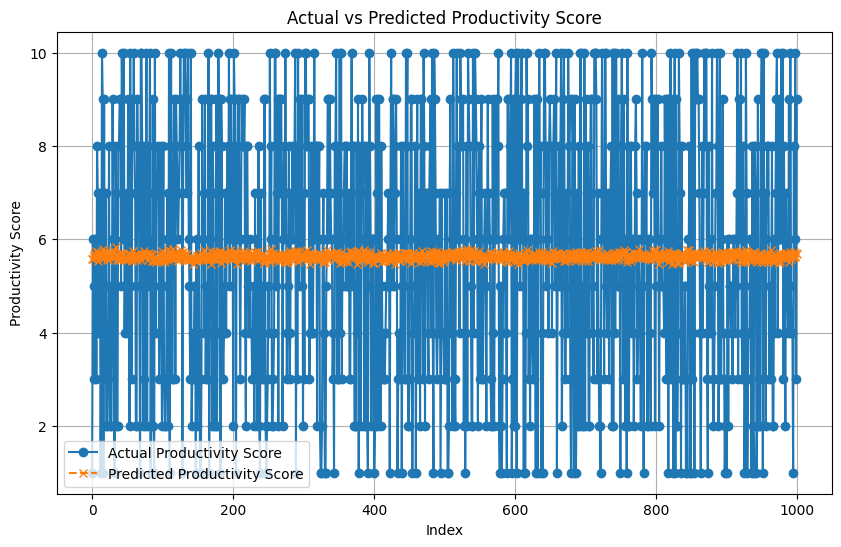

In [88]:
# Define Features (X) and Target (y)
X = df[['Total Sleep Hours', 'Exercise (mins/day)', 'Caffeine Intake (mg)', 'Screen Time Before Bed (mins)', 'Work Hours (hrs/day)', 'Mood Score']]
y = df['Productivity Score']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict
y_pred = lin_reg.predict(X_test)

# Model Performance
mse = mean_squared_error(y_test, y_pred)
print("Linear Regression MSE:", mse)
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Productivity Score', marker='o')
plt.plot(y_pred, label='Predicted Productivity Score', marker='x', linestyle='--')

plt.title('Actual vs Predicted Productivity Score')
plt.xlabel('Index')
plt.ylabel('Productivity Score')
plt.legend()
plt.grid(True)
plt.show()


Missing values after imputation:
 Date                             0
Person_ID                        0
Age                              0
Gender                           0
Sleep Start Time                 0
Sleep End Time                   0
Total Sleep Hours                0
Sleep Quality                    0
Exercise (mins/day)              0
Caffeine Intake (mg)             0
Screen Time Before Bed (mins)    0
Work Hours (hrs/day)             0
Productivity Score               0
Mood Score                       0
Stress Level                     0
dtype: int64
Logistic Regression Accuracy: 0.58


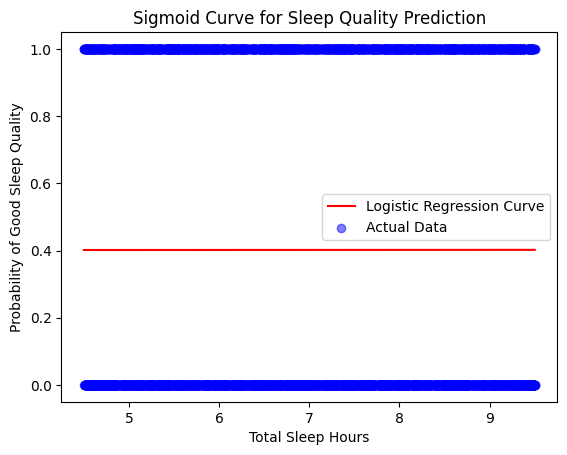

New Data Predictions:
   Age  Total Sleep Hours  Exercise (mins/day)  Caffeine Intake (mg)  \
0   25                  5                   30                   100   
1   35                  8                   60                    50   

   Screen Time Before Bed (mins)  Predicted Sleep Quality  Probability  
0                            120                        0     0.395955  
1                             30                        0     0.398171  


In [79]:
df['Sleep Quality'] = df['Sleep Quality'].apply(lambda x: 1 if x > 6 else 0)

# Check for missing values after imputation
print("Missing values after imputation:\n", df.isnull().sum())

# Define Features and Target
X = df[['Age', 'Total Sleep Hours', 'Exercise (mins/day)', 'Caffeine Intake (mg)', 'Screen Time Before Bed (mins)']]
y = df['Sleep Quality']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

# --- Sigmoid Curve for Total Sleep Hours ---
X_sleep = df[['Total Sleep Hours']].values.reshape(-1, 1)
log_reg_sleep = LogisticRegression()
log_reg_sleep.fit(X_sleep, y)

# Generate values for plotting
sleep_range = np.linspace(X_sleep.min(), X_sleep.max(), 100).reshape(-1, 1)
probabilities = log_reg_sleep.predict_proba(sleep_range)[:, 1]

# Plot Sigmoid Curve
plt.plot(sleep_range, probabilities, color="red", label="Logistic Regression Curve")
plt.scatter(X_sleep, y, color="blue", alpha=0.5, label="Actual Data")
plt.xlabel("Total Sleep Hours")
plt.ylabel("Probability of Good Sleep Quality")
plt.title("Sigmoid Curve for Sleep Quality Prediction")
plt.legend()
plt.show()

# --- Predict on New Data ---
new_data = pd.DataFrame({
    "Age": [25, 35],
    "Total Sleep Hours": [5, 8],
    "Exercise (mins/day)": [30, 60],
    "Caffeine Intake (mg)": [100, 50],
    "Screen Time Before Bed (mins)": [120, 30]
})

# Standardize new data
new_data_scaled = scaler.transform(new_data)
new_predictions = log_reg.predict(new_data_scaled)
new_probabilities = log_reg.predict_proba(new_data_scaled)[:, 1]
new_data["Predicted Sleep Quality"] = new_predictions
new_data["Probability"] = new_probabilities

print("New Data Predictions:")
print(new_data)


Cluster Centroids:
    Total Sleep Hours  Exercise (mins/day)  Caffeine Intake (mg)  \
0           8.472067            46.138889            153.364444   
1           6.412413            43.025594            143.174893   
2           5.838371            42.436177            142.752405   

   Screen Time Before Bed (mins)  Mood Score  Work Hours (hrs/day)  
0                      95.845556    4.655000              7.785472  
1                      90.025594    8.340037              8.139700  
2                      87.781911    3.071199              8.061751  


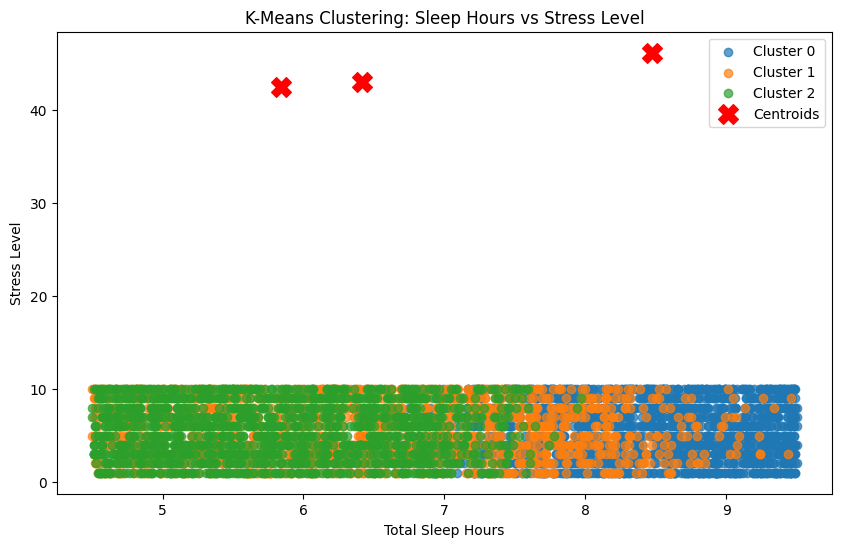

In [82]:

# Define Features (Using the same features from KNN)
X = df[['Total Sleep Hours', 'Exercise (mins/day)', 'Caffeine Intake (mg)',
        'Screen Time Before Bed (mins)', 'Mood Score', 'Work Hours (hrs/day)']]

# Standardize Features (Important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Get Cluster Centroids (Inverse transform to original scale)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centroids, columns=X.columns)
print("Cluster Centroids:\n", centroid_df)

# Scatter Plot: Total Sleep Hours vs. Stress Level (Colored by Clusters)
plt.figure(figsize=(10, 6))
for cluster in range(3):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Total Sleep Hours'], cluster_data['Stress Level'], label=f'Cluster {cluster}', alpha=0.7)

# Plot Centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.xlabel("Total Sleep Hours")
plt.ylabel("Stress Level")
plt.title("K-Means Clustering: Sleep Hours vs Stress Level")
plt.legend()
plt.show()

